<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - LSTMSs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the LSTM code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

### Load data

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, SimpleRNN, LSTM

In [5]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [6]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


#### Explore the data

In [7]:
# Do not change this line. You need the +1 for some reason. 
max_features = len(word_index.values()) + 1

In [20]:
# word_index

In [8]:
max_features

30980

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8982,), (2246,), (8982,), (2246,))

In [10]:
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

8982 train sequences
2246 test sequences


In [21]:
# X_train[0]

#### Visualize the data

In [22]:
# Perform reverse word lookup and make it callable
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [23]:
# Concatonate test and training datasets
allreviews = np.concatenate((X_train, X_test), axis=0)

# Review lengths across test and training whole datasets
print("Maximum article length: {}".format(len(max((allreviews), key=len))))
print("Minimum article length: {}".format(len(min((allreviews), key=len))))
result = [len(x) for x in allreviews]
print("Mean article length: {}".format(np.mean(result)))

# Print an article and it's class as stored in the dataset. Replace the number
# to select a different article.
print("")
print("Machine readable article")
print("  Article Text: " + str(X_train[60]))
print("  Article Sentiment: " + str(y_train[60]))

# Print an article and it's class in human readable format. Replace the number
# to select a different article.
print("")
print("Human Readable article")
print("  Article Text: " + decode_review(X_train[5]))
print("  Article Sentiment: " + str(y_train[5]))

Maximum article length: 2376
Minimum article length: 2
Mean article length: 145.96419665122906

Machine readable article
  Article Text: [1, 53, 46, 160, 26, 14, 74, 142, 26, 39, 46, 4312, 4938, 14, 74, 957, 4835, 86, 19, 445, 18, 14, 32, 451, 18, 17, 12]
  Article Sentiment: 3

Human Readable article
  Article Text: the 0 cost officials have grow be part how up vieux business mln in 20 cts delegate mln 580 oesch not accord was 89 come associates marine by 1 control 1986 panel in allow sheet agreement in recent adequate marks acquisition that now 03 eni shr as trade had vs tonnes income u statement with tariffs from trade markets dlrs trade eni strike export said terms 701 friendswood mln net over 1986 36 that in redman said in 20 7 that four in world 5 units and credits 1 oesch mln by 14 eni u statement with department banking 000 for 0 with in pay said in despite cost at similar by crude announced said such now miyazawa rather at marks eni mln at third rate now 5 spring business miya

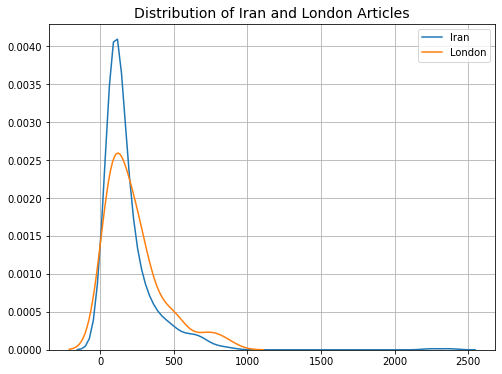

In [24]:
# Get the lengths for Iran and London news articles
all_labels = np.concatenate([y_train, y_test])
positive = np.array(result)[all_labels==1]
negative = np.array(result)[all_labels==0]

plt.figure(figsize=(8,6))
sns.distplot(positive, label='Iran', hist=False)
sns.distplot(negative, label='London', hist=False)
plt.title('Distribution of Iran and London Articles', fontsize=14)
plt.grid(True)
plt.legend();

In [25]:
maxlen = 30 # you can make it longer or shorter
batch_size=32

print('Pad Sequences (samples x time)')
x_train = sequence.pad_sequences(X_train, maxlen=maxlen)
x_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)

Pad Sequences (samples x time)
x_train shape:  (8982, 30)
x_test shape:  (2246, 30)


#### LSTM Model Architecture

In [39]:
lstm = Sequential()
lstm.add(Embedding(max_features, 16))
lstm.add(LSTM(8, dropout=0.2, recurrent_dropout=0.2)) # will run for a longer time
lstm.add(Dense(1, activation='sigmoid'))


# Model compile
lstm.compile(loss='binary_crossentropy',
             optimizer='adam', 
             metrics=['accuracy'])

lstm.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 16)          495680    
_________________________________________________________________
lstm_10 (LSTM)               (None, 8)                 800       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 496,489
Trainable params: 496,489
Non-trainable params: 0
_________________________________________________________________


In [40]:
lstm_history = lstm.fit(x_train, y_train,
          batch_size=batch_size, 
          epochs=5, 
          validation_data=(x_test,y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/5
8982/8982 [==============================] - 14s 2ms/sample - loss: -32.4255 - accuracy: 0.0495 - val_loss: -54.0998 - val_accuracy: 0.0396
Epoch 2/5
8982/8982 [==============================] - 10s 1ms/sample - loss: -66.4160 - accuracy: 0.0499 - val_loss: -76.7431 - val_accuracy: 0.0396
Epoch 3/5
8982/8982 [==============================] - 12s 1ms/sample - loss: -88.2052 - accuracy: 0.0499 - val_loss: -97.4142 - val_accuracy: 0.0396
Epoch 4/5
8982/8982 [==============================] - 11s 1ms/sample - loss: -108.8537 - accuracy: 0.0499 - val_loss: -117.5260 - val_accuracy: 0.0396
Epoch 5/5
8982/8982 [==============================] - 11s 1ms/sample - loss: -129.0878 - accuracy: 0.0499 - val_loss: -137.3395 - val_accuracy: 0.0396


In [41]:
loss, accuracy = lstm.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', accuracy)

2246/2246 [==============================] - 0s 158us/sample - loss: -137.3395 - accuracy: 0.0396
Test score: 0.039626002


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

- This function transforms a list of num_samples sequences (lists of integers) into a 2D Numpy array of shape. Padding is useful when sequences are sent in batches to the LSTM network. 


## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

- LSTM gives us the most Control-ability and thus, Better Results. But also comes with more Complexity and Operating Cost.


## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

- sequential data such as words,  sentences, sound spectrogram, etc. So applications with translation,  sentiment analysis,  text generation, etc. LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series.


<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained) to detect which of the images with the `frog_images` subdirectory has a frog in it. Note: You will need to upload the images to Colab. 

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

The skimage function below will help you read in all the frog images into memory at once. You should use the preprocessing functions that come with ResnetV2 to help resize the images prior to inference. 

In [42]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

In [43]:
from tensorflow.keras.preprocessing import image

In [44]:
from skimage.io import imread_collection

images = imread_collection('./frog_images/*.jpg')

In [45]:
print(type(images))
print(type(images[0]), end="\n\n")

<class 'skimage.io.collection.ImageCollection'>
<class 'numpy.ndarray'>



Your goal is to validly run ResNet50v2 on the input images - don't worry about tuning or improving the model. Print out the predictions in any way you see fit. 

*Hint* - ResNet 50v2 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals:* 
- Check for other things such as fish.
- Print out the image with its predicted label
- Wrap everything nicely in well documented fucntions

In [46]:
images[0].shape

(2137, 1710, 3)

In [47]:
def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50V2(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    print(results)
    for entry in results:
        if entry[1] == 'frog':
            return entry[2]
    return 0.0

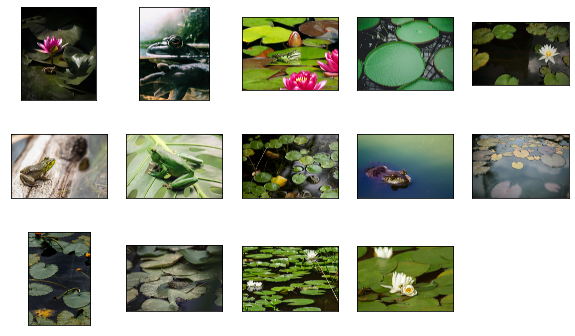

In [48]:
plt.figure(figsize=(10,10))
for i in range(14):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
plt.show()

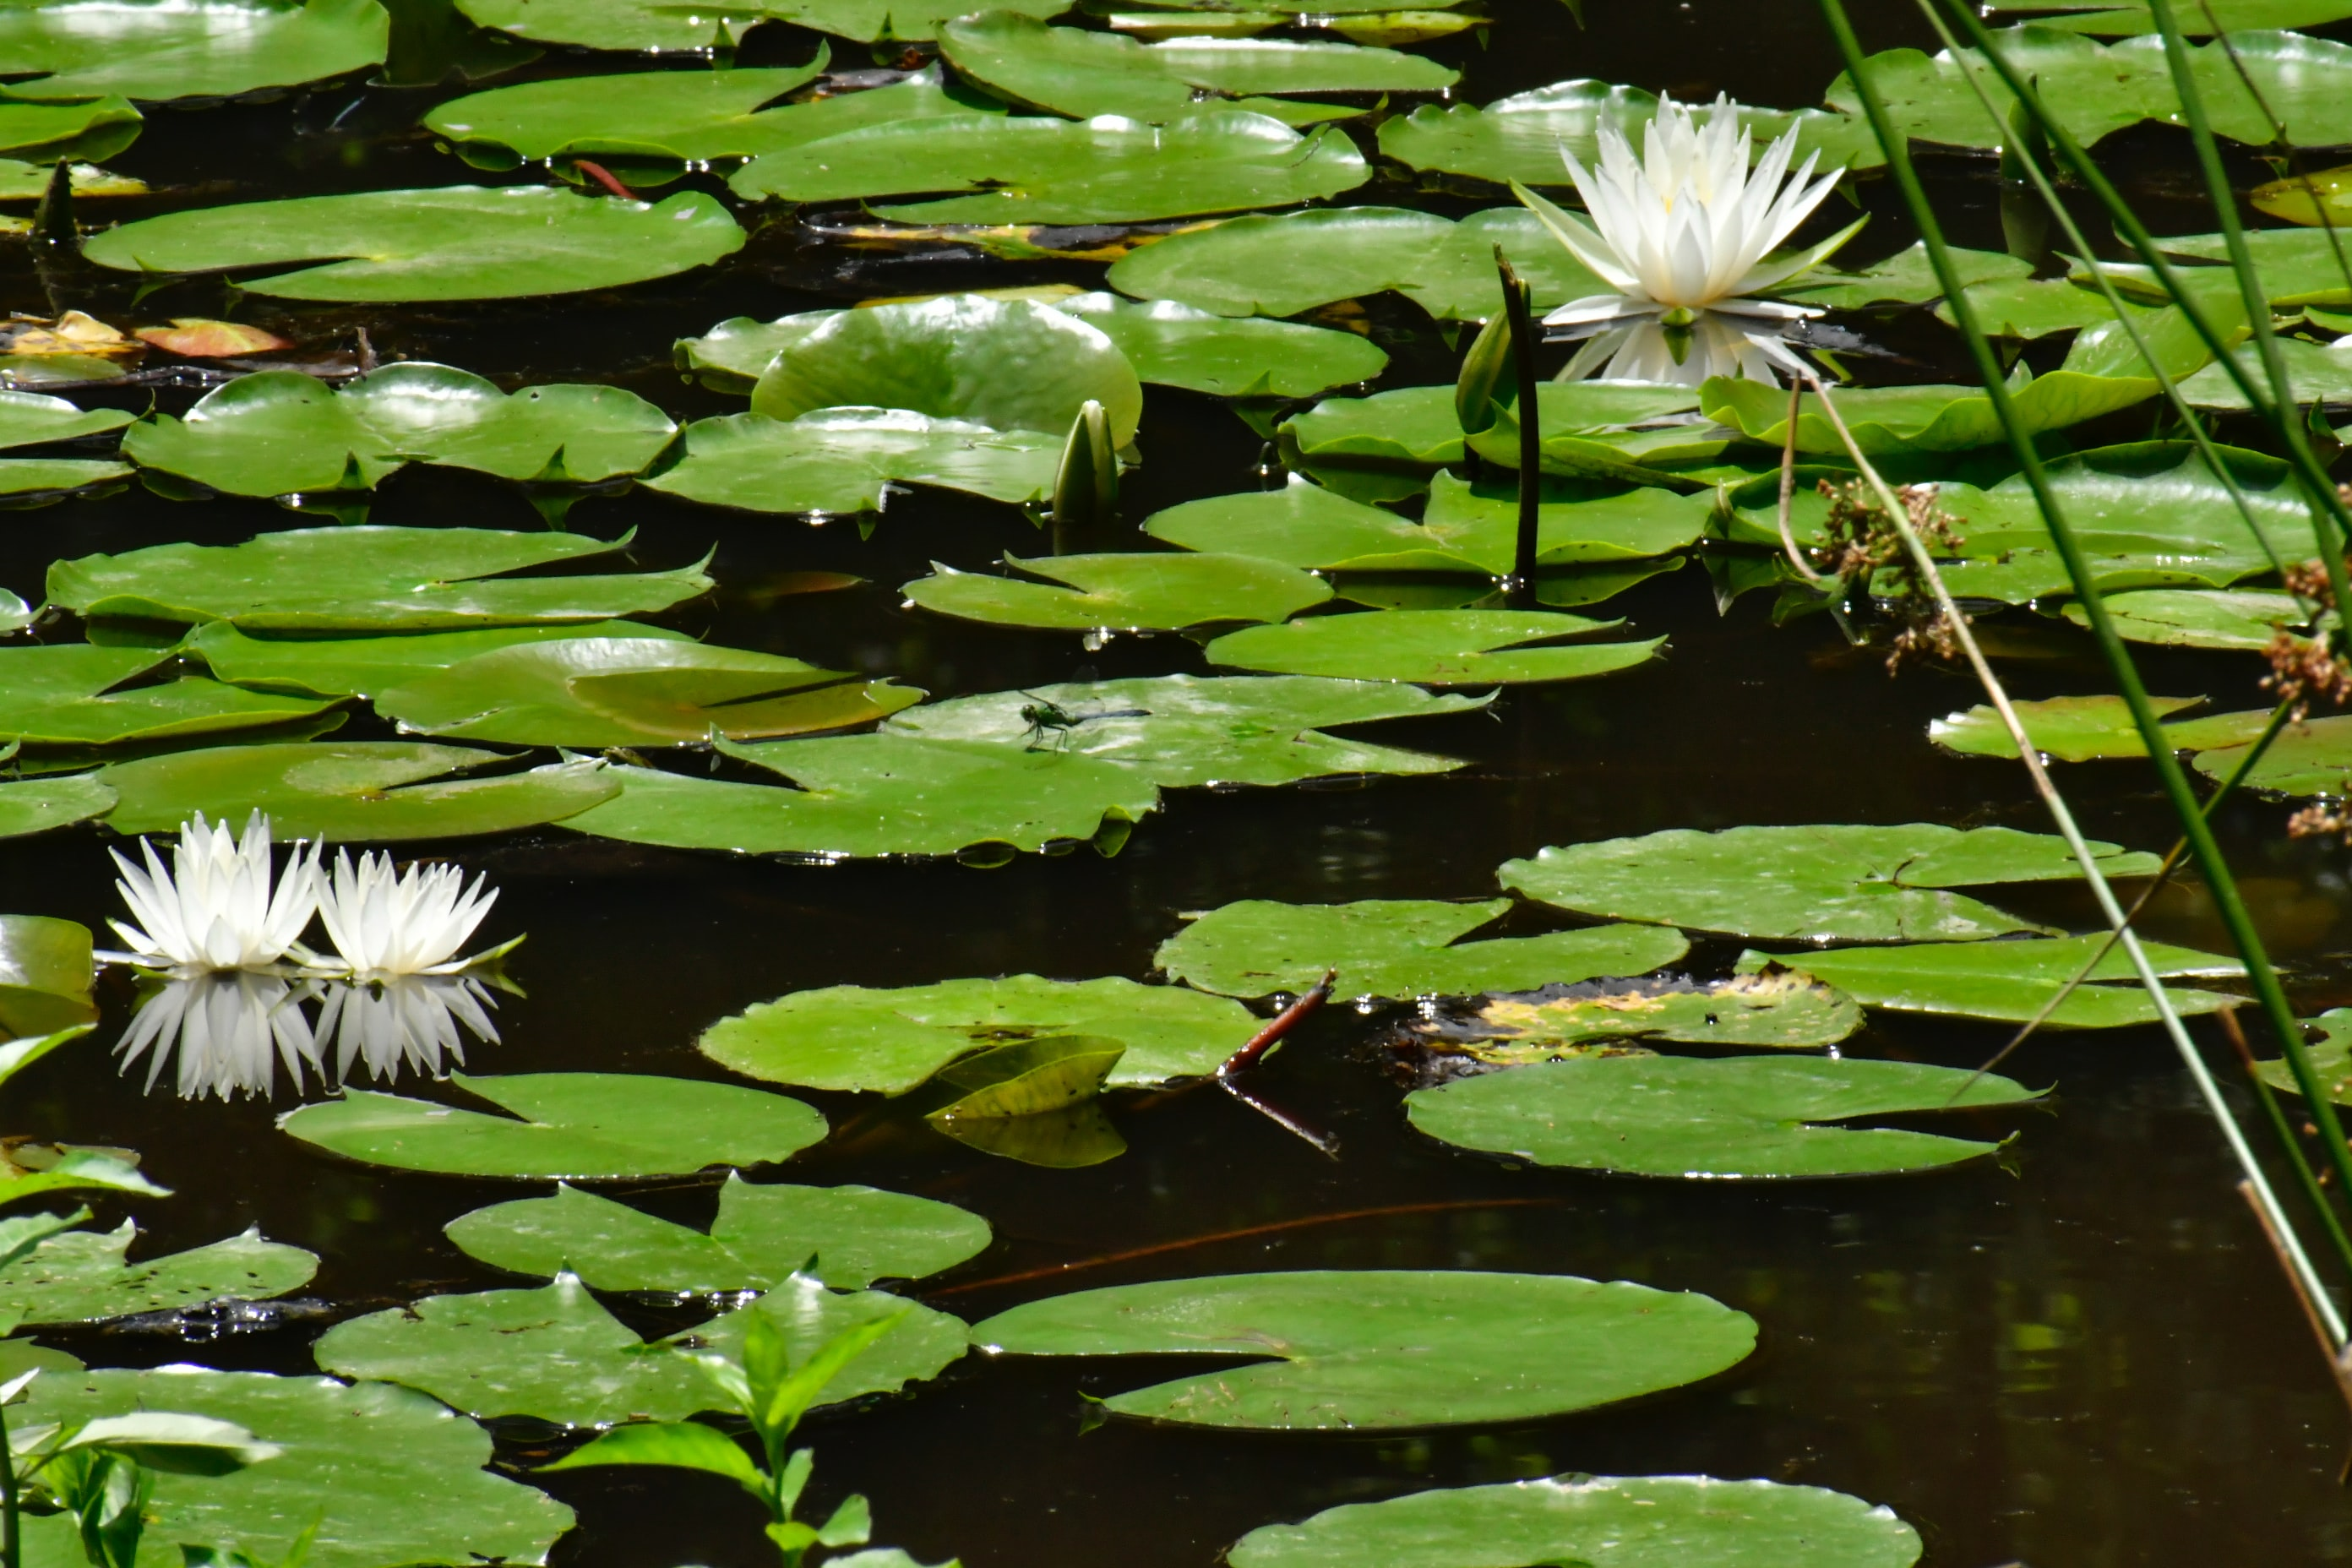

In [51]:
from IPython.display import Image
Image(filename='./frog_images/serenity-mitchell-tUDSHkd6rYQ-unsplash.jpg', width=400)

In [52]:
img_contains_frog(process_img_path('./frog_images/serenity-mitchell-tUDSHkd6rYQ-unsplash.jpg'))

[('n11939491', 'daisy', 0.8145664), ('n03598930', 'jigsaw_puzzle', 0.0895487), ('n03457902', 'greenhouse', 0.0077825557)]


0.0

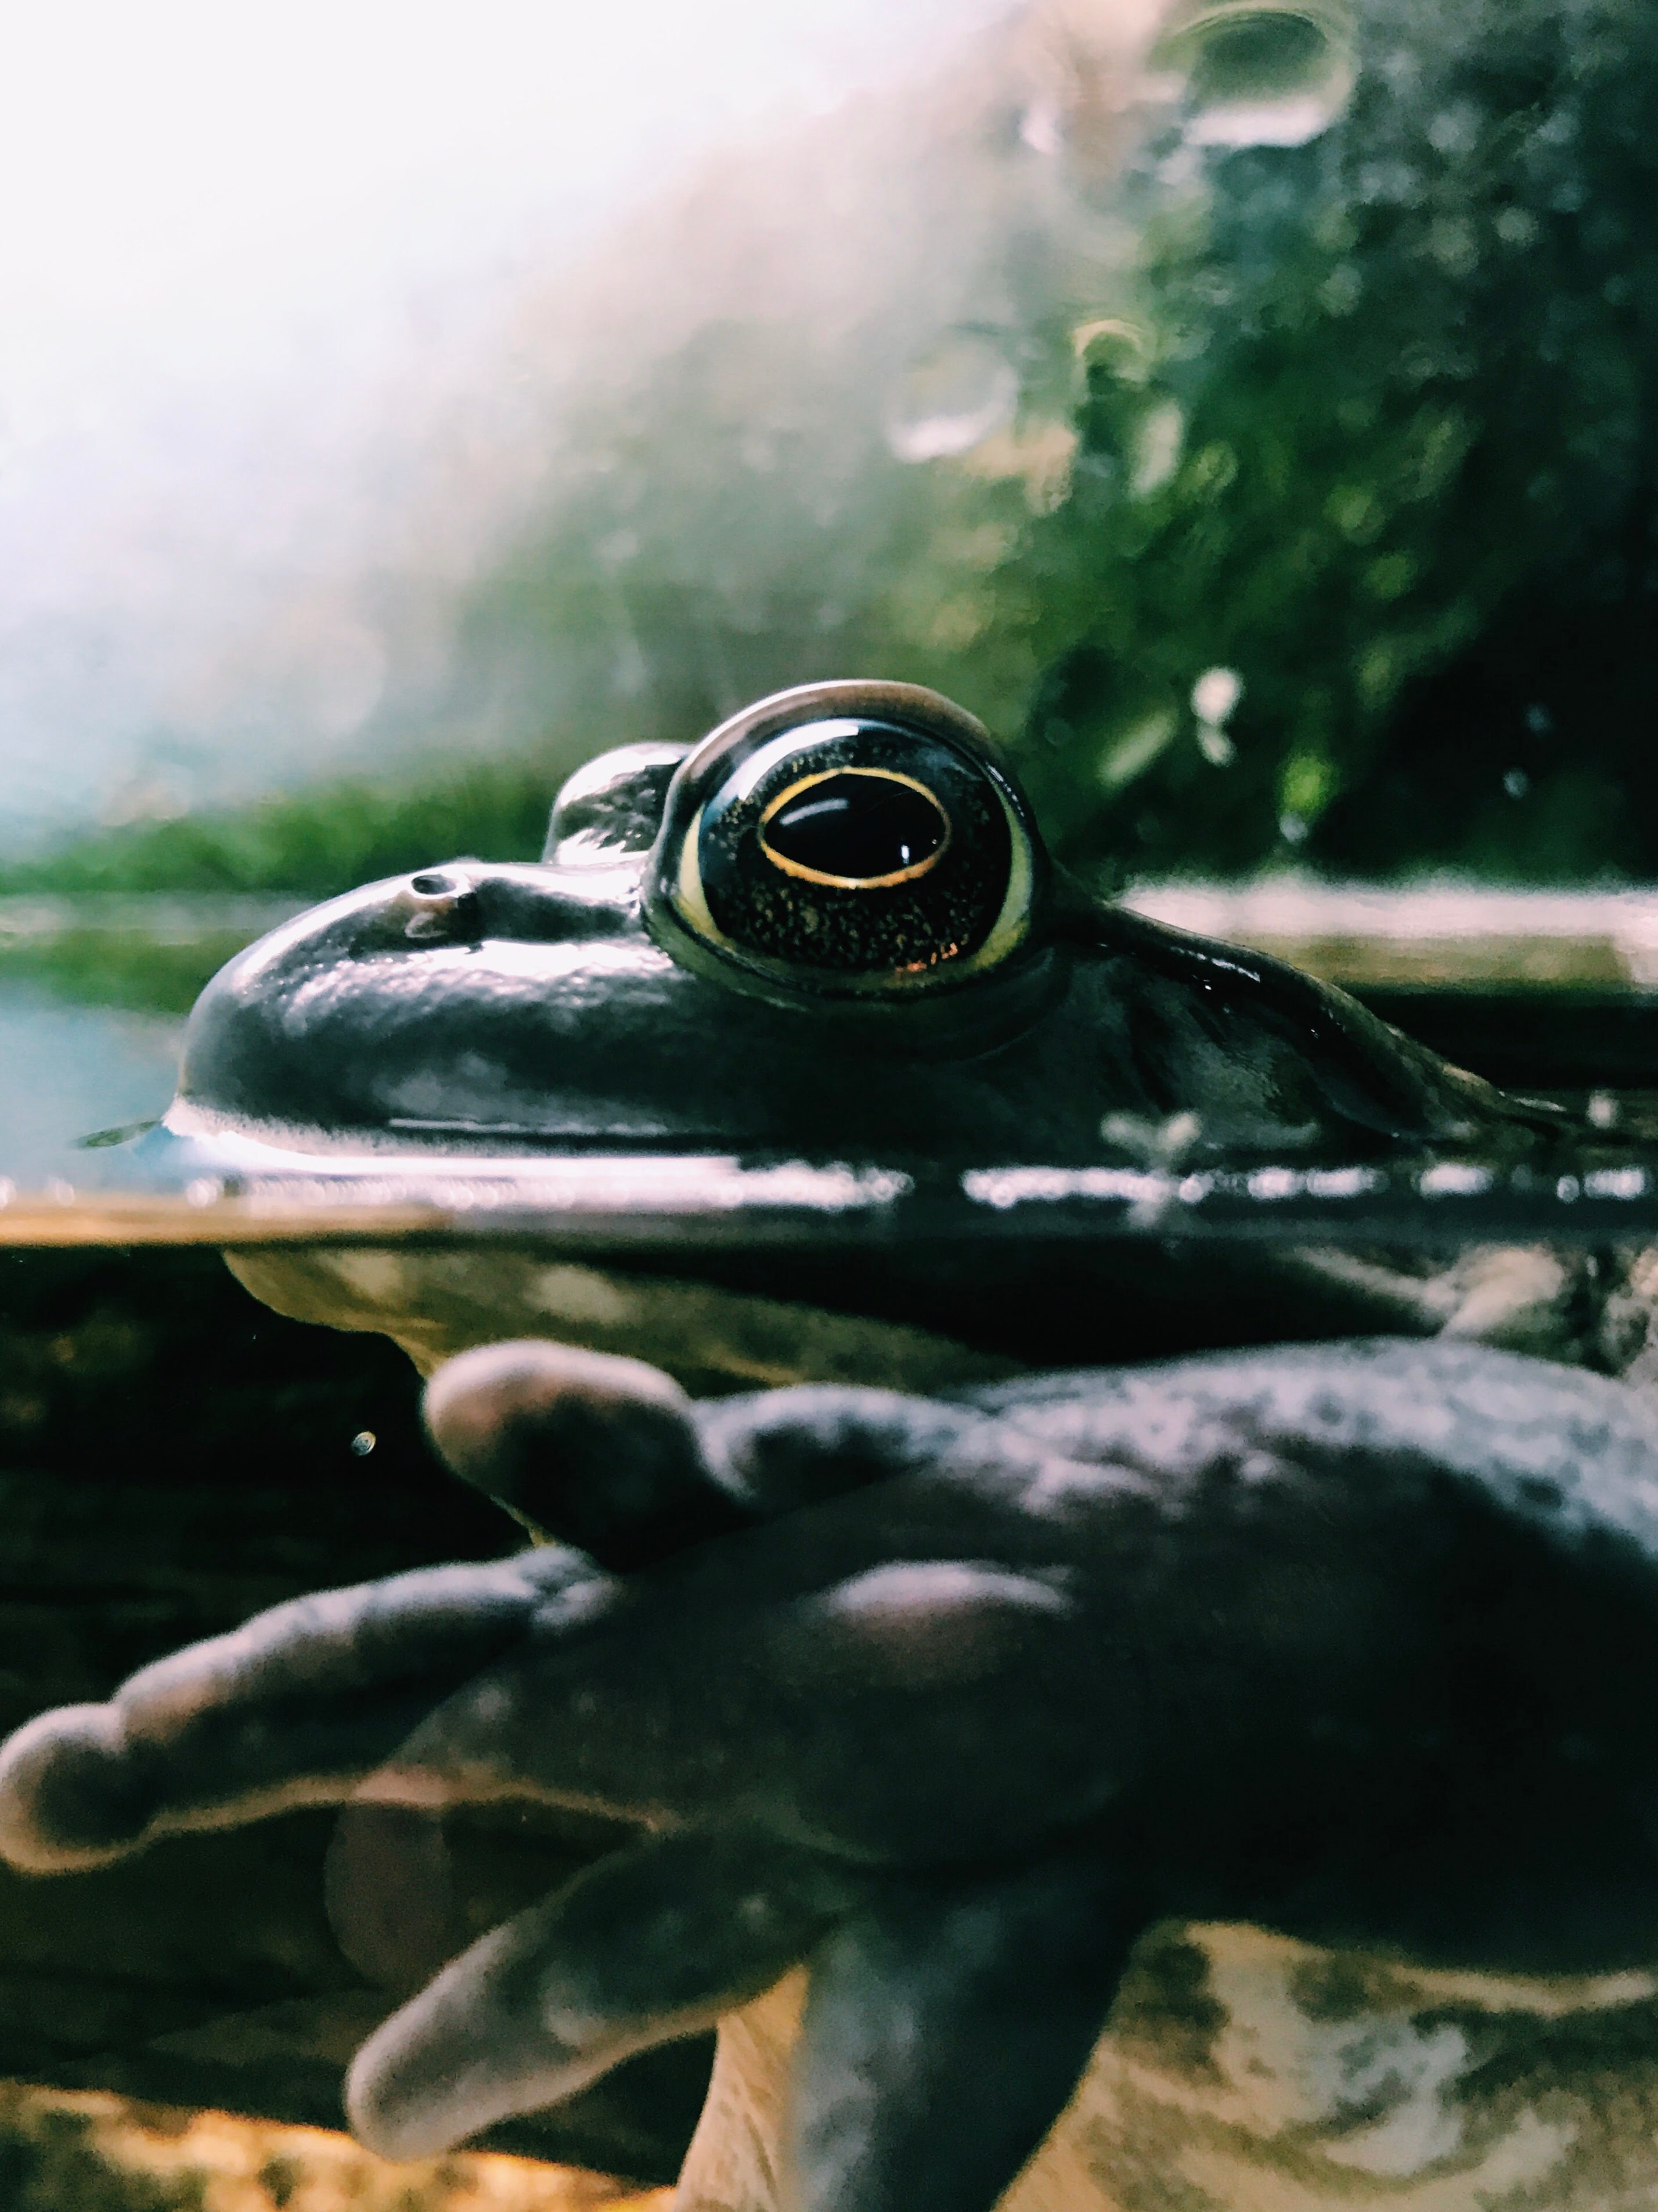

In [54]:
Image(filename='./frog_images/drew-brown-VBvoy5gofWg-unsplash.jpg', width=400)

In [53]:
img_contains_frog(process_img_path('./frog_images/drew-brown-VBvoy5gofWg-unsplash.jpg'))

[('n01641577', 'bullfrog', 0.9959914), ('n02655020', 'puffer', 0.0024455723), ('n01667778', 'terrapin', 0.0010096523)]


0.0

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

- Autoencoder, reduces data dimensions by learning how to ignore the noise in the data. Image Denoising is one of the many use practices. You can use it to denoise any type of images, audio or scanned documents.


<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

Data analysis, model architecture, using feature importances.

- What area of Data Science would you most like to learn more about, and why?

Data analysis, I’m interested in the most.

- Where do you think Data Science will be in 5 years?

It will thrive. 

- What are the threats posed by AI to our society?

At this time data privacy is the TOP threat to the society.

- How do you think we can counteract those threats? 

By implementing a code of condact while doing our job.

- Do you think achieving General Artifical Intelligence is ever possible?

Yes it is possible.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [63]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")